**SVM model**

In [10]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
excel = "Dataset.xlsx"

# *Test SVM model here!!*

In [11]:
def importdata(excel):
    #import attribute
    data = pd.read_excel(excel, index_col=None, header=1)
    x = data.iloc[:, 0:9]
    x = np.array(x)
    #import class
    y = data.iloc[:, 9]
    y = np.array(y)
    return x, y

def importtest(excel):
    testset = pd.read_excel(excel, sheet_name=1, header=1, index_col=None)
    test = testset.iloc[:, 0:9]
    test = np.array(test)
    return test

def SVMmodel(excel, sp):
    x, y = importdata(excel)
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=sp, random_state=2)
    model = SVC(kernel='poly', degree=7) 
    model = model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    return y_pred, y_test

def SVMmodel_test(excel, sp):
    x, y = importdata(excel)
    test = importtest(excel)
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=sp, random_state=2)
    model = SVC(kernel='poly', degree=7) 
    model = model.fit(x_train, y_train)
    y_pred = model.predict(test)
    return y_pred

#### Train model here!

In [12]:
y_pred, y_test = SVMmodel(excel, 0.2)
metrics.accuracy_score(y_test, y_pred)

0.9163346613545816

#### Use model here!

In [13]:
pred = SVMmodel_test(excel, 0.2)
len(pred)

100

# *Interpretation (Do NOT RUN) !!*

### Import training dataset

In [7]:
def importdata(excel):
    #import attribute
    data = pd.read_excel(excel, index_col=None, header=1)
    x = data.iloc[:, 0:9]
    x = np.array(x)
    #import class
    y = data.iloc[:, 9]
    y = np.array(y)
    return x, y

### Import testing dataset

In [6]:
def importtest(excel):
    testset = pd.read_excel(excel, sheet_name=1, header=1, index_col=None)
    test = testset.iloc[:, 0:9]
    test = np.array(test)
    return test

### Dividing dataset

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

### Creating a SVM model

In [46]:
# Create Decision Tree classifer object
model = SVC(kernel='poly', degree=7) 

# Train Decision Tree Classifer
model = model.fit(x_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(x_test)

### ***Experiment Result***

**choose the optimal splitting cut**

In [49]:
def SVMmodel(excel, sp):
    x, y = importdata(excel)
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=sp, random_state=2)
    model = SVC(kernel='poly', degree=7) 
    model = model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    return y_pred, y_test

,splitting,accuracy
0,0.10,0.936508
1,0.15,0.914894
2,0.20,0.916335
3,0.25,0.891720
4,0.30,0.882979
5,0.35,0.876993
6,0.40,0.864542


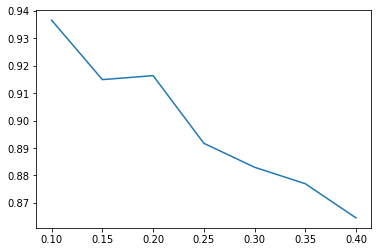

In [50]:
accu = []
horz = []
for sp in np.arange(0.1, 0.4, 0.05):
    y_pred, y_test = SVMmodel(excel, sp)
    ac = metrics.accuracy_score(y_test, y_pred)
    accu.append(ac)
    horz.append(sp)
plt.plot(horz, accu)  
data = {'splitting':horz, 'accuracy':accu}
pd.DataFrame(data, index=None)

### ***Accuracy***

In [58]:
y_pred, y_test = SVMmodel(excel, 0.2)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
scores1 = metrics.precision_recall_fscore_support(y_test, y_pred, average='micro')
print(confusion_matrix(y_test,y_pred))
print("Precision: ", scores1[0])
print("Recall: " , scores1[1])
print("F1-Score: " ,scores1[2])

Accuracy: 0.9163346613545816
[[126   1   6]
 [  0  12   8]
 [  5   1  92]]
Precision:  0.9163346613545816
Recall:  0.9163346613545816
F1-Score:  0.9163346613545816


In [59]:
y_pred, y_test = SVMmodel(excel, 0.2)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
scores1 = metrics.precision_recall_fscore_support(y_test, y_pred, average='macro')
print(confusion_matrix(y_test,y_pred))
print("Precision: ", scores1[0])
print("Recall: " , scores1[1])
print("F1-Score: " ,scores1[2])

Accuracy: 0.9163346613545816
[[126   1   6]
 [  0  12   8]
 [  5   1  92]]
Precision:  0.8956331488378154
Recall:  0.8287146437522378
F1-Score:  0.8541295306001189
